In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Simple CNN for Edgelovers

## a) Generation of data

In [2]:
def generate_data(xlen, ylen, n):
    data = np.zeros(shape=(n, xlen, ylen, 1), dtype=np.uint8)
    labels = np.zeros(shape=(n), dtype=np.int).squeeze()
    
    for i in range(n):
        img = np.zeros(shape=(xlen, ylen, 1), dtype=np.uint8)
        
        v_or_h = np.random.randint(0, 2)
        lines = 10
        
        if v_or_h: # horizontal
            label = 0
            for _ in range(lines):
                y = np.random.randint(0, ylen)
                x1 = np.random.randint(0, xlen - 10)
                x2 = x1 + 10
                img[y, x1:x2] = 255
        else:  # vertical
            label = 1
            for _ in range(lines):
                x = np.random.randint(0, xlen)
                y1 = np.random.randint(0, ylen - 10)
                y2 = y1 + 10
                img[y1:y2, x] = 255
        
        data[i] = img.copy()
        labels[i] = label
    return data, labels.squeeze()

In [3]:
x0, y0 = generate_data(50, 50, 1000)
x2, y2 = generate_data(50, 50, 1000);
y0 = to_categorical(y0)
y2 = to_categorical(y2)

[1. 0.]


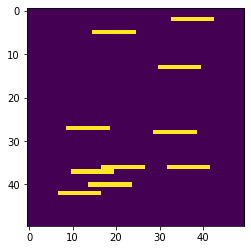

In [4]:
img = x0[0, :, :, 0]
plt.imshow(img)
print(y0[0])

## b) Build the simplest possible CNN

In [12]:
batch_size = 128
epochs = 100
n_features = 2

model = Sequential()
model.add(Conv2D(n_features, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(50, 50, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss=categorical_crossentropy, optimizer=SGD(lr=0.01), metrics=['accuracy'])

model.summary()
print("\n")

model.fit(x0, y0, batch_size=batch_size, epochs=epochs, validation_data=(x2, y2))

score = model.evaluate(x2, y2, verbose=0)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 2)         20        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 2)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                11530     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 22        
Total params: 11,572
Trainable params: 11,572
Non-trainable params: 0
_________________________________________________________________


Train on 1000 samples, validate on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 548us/

Epoch 49/100
1000/1000 [==============================] - 0s 58us/sample - loss: 0.0032 - accuracy: 0.9980 - val_loss: 0.0101 - val_accuracy: 0.9970
Epoch 50/100
1000/1000 [==============================] - 0s 59us/sample - loss: 0.0032 - accuracy: 0.9980 - val_loss: 0.0101 - val_accuracy: 0.9970
Epoch 51/100
1000/1000 [==============================] - 0s 62us/sample - loss: 0.0031 - accuracy: 0.9980 - val_loss: 0.0100 - val_accuracy: 0.9970
Epoch 52/100
1000/1000 [==============================] - 0s 65us/sample - loss: 0.0031 - accuracy: 0.9980 - val_loss: 0.0099 - val_accuracy: 0.9970
Epoch 53/100
1000/1000 [==============================] - 0s 58us/sample - loss: 0.0030 - accuracy: 0.9980 - val_loss: 0.0099 - val_accuracy: 0.9970
Epoch 54/100
1000/1000 [==============================] - 0s 66us/sample - loss: 0.0030 - accuracy: 0.9980 - val_loss: 0.0098 - val_accuracy: 0.9970
Epoch 55/100
1000/1000 [==============================] - 0s 61us/sample - loss: 0.0029 - accuracy: 0.9980

## c) Visualize the learned kernel

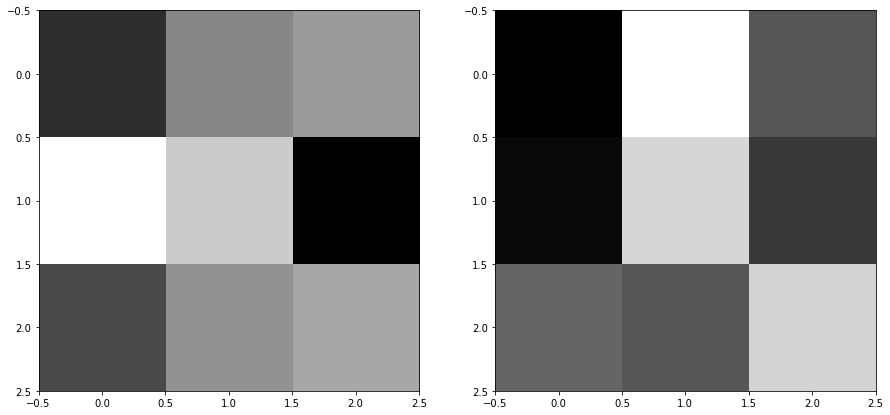

In [13]:
conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()

count = 0
rows, cols = 1, 2
fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(15,10))
for j in range(cols):
    f = filters[:, :, 0, count]
    axes[j].imshow(f, cmap='gray')
    count += 1